In [1]:
import torch

In [152]:
w2 = torch.tensor([
    [0, 1]
]).float()

In [174]:
n = 100
x = torch.randn(100, 2)
y = x[:,0] / 2 - x[:,1] /3

In [175]:
ls = torch.linalg.inv(x.T @ x) @ x.T @ y

In [176]:
ls

tensor([ 0.5000, -0.3333])

In [177]:
ls.unsqueeze(0)

tensor([[ 0.5000, -0.3333]])

In [178]:
w2.T

tensor([[0.],
        [1.]])

In [179]:
w1 = torch.outer(ls, w2.view(2)) / torch.norm(w2)

In [180]:
w1

tensor([[ 0.0000,  0.5000],
        [-0.0000, -0.3333]])

In [181]:
torch.sum(w1, dim=1)

tensor([ 0.5000, -0.3333])

(<Figure size 500x500 with 1 Axes>, <Axes: >)

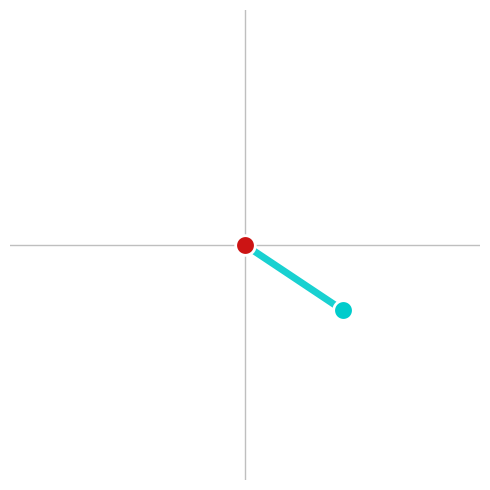

In [199]:
plot_vibrant_vectors(w1.T)

In [198]:
def plot_vibrant_vectors(vectors, figsize=(5, 5), arrow_scale=1.0, line_width=5):
    """
    Plot n 2-dimensional vectors with vibrant colors similar to the provided image.
    
    Parameters:
    -----------
    vectors : array-like, shape (n, 2)
        Matrix where each row is a 2D vector to plot
    figsize : tuple, default (10, 10)
        Figure size in inches
    arrow_scale : float, default 1.0
        Scale factor for arrow length
    line_width : float, default 3
        Width of the arrow lines
    
    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
    """
    
    # Convert to numpy array if needed
    vectors = np.array(vectors)
    n_vectors = vectors.shape[0]
    
    def generate_vibrant_colors(n):
        """Generate vibrant colors using HSV color space"""
        colors = []
        for i in range(n):
            # Use full hue range with high saturation and value for vibrant colors
            hue = i / n  # Evenly space hues around the color wheel
            saturation = 0.9 + 0.1 * (i % 2)  # Very high saturation (0.9-1.0)
            value = 0.8 + 0.2 * ((i // 2) % 2)  # High brightness (0.8-1.0)
            rgb = mcolors.hsv_to_rgb([hue, saturation, value])
            colors.append(rgb)
        return colors
    
    # Generate vibrant colors
    colors = generate_vibrant_colors(n_vectors)
    
    # Create the plot with white background
    fig, ax = plt.subplots(figsize=figsize, facecolor='white')
    ax.set_facecolor('white')
    
    # Plot each vector as a line with dot at the end
    for i, vector in enumerate(vectors):
        # Scale the vector
        scaled_vector = vector * arrow_scale
        
        # Plot line from origin to vector endpoint
        ax.plot([0, scaled_vector[0]], [0, scaled_vector[1]], 
                color=colors[i], linewidth=line_width, alpha=0.9)
        
        # Plot dot at the end of the vector
        ax.scatter(scaled_vector[0], scaled_vector[1], 
                  s=200, c=[colors[i]], marker='o', 
                  edgecolors='white', linewidth=2,
                  alpha=1, zorder=10)
    
    # Set the axis properties
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    
    # Make axes equal and add grid
    ax.set_aspect('equal', adjustable='box')
    # ax.grid(True, alpha=0.2, color='lightgray', linewidth=3)
    
    # Add axis lines through origin
    ax.axhline(y=0, color='gray', linewidth=1, alpha=0.5)
    ax.axvline(x=0, color='gray', linewidth=1, alpha=0.5)
    
    # Remove ticks and labels for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Remove spines for minimal look
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    plt.tight_layout()
    
    return fig, ax